# 이미지 분석 모델 실행

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/데이터/텐서플로우

/content/drive/MyDrive/데이터/텐서플로우


## 모델에 사용될 이미지 전처리
- h5 모델제작할 때와 같은 상황을 만들어야 함.
- 이 작업에서는 아래의 작업을 하기 전에 숫자 3개(3,4,5)를 나누어야 함.
-h5모델에 들어간 자료는 (x자료는)
1. 사이즈는 28*28이다.
2. 그레이스케일이다.(차원은 2차원)
3. 배경이 어둡고 내용이 밝다.
4. 0~1사이의 값이다.(/255하였다.)
5. 28*28을 (1,784)로 변경하였다.

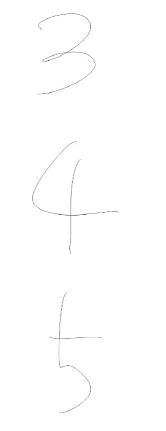

In [ ]:
# 이미지 관련 모듈은 대표적으로 PIL과 openCV(훨씬 다양)가 있음.
# openCV는 욜로(객체검출)와 함께 다양하게 사용됨. 영상물에서의 이미지검출도 openCV
from PIL import Image
img = Image.open('number.png')
img

In [ ]:
import numpy as np

print(img.size) # PIL은 너비와 높이로 나옴
np.shape(img) # np.shape은 (431,166,3)으로 나옴 => 한 개 자료만 읽었는데 3차원까지 나오면 (행,열,채널개수) => 채널개수가 3이면 컬러임.

(166, 431)


(431, 166, 3)

### 그림 자르기

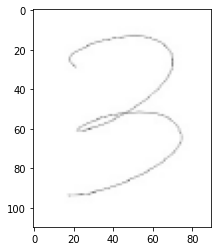

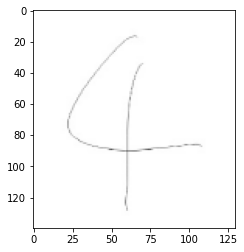

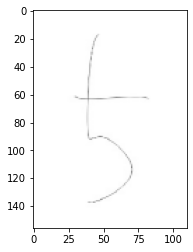

In [ ]:
# image crop(이미지 자르기) - 'PILLOW에서 그림자르기'라고 검색
# img.crop((시작하는 왼쪽 위치 start Left, 시작하는 위쪽 위치 start Up, end Right, end Down))
# 각 이미지의 크기가 같지 않아도 괜찮음 -> 뒤에서 행렬 크기를 맞출 것이기 때문
img1 = img.crop([20,0,110,110]) # img.crop((0,0,166,100))
img2 = img.crop([10,125,140,265])
img3 = img.crop([20,275,130,431])

import matplotlib.pyplot as plt
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3) # 사이즈를 확인할 때 사용
plt.show()

### 예측 함수 만들기
- 전처리 및 예측 함수

- Convert
    - ```.convert()```에 색상 표현 방식을 넘겨줘서 이미지를 원하는 색상표현으로 변경할 수 있다.

    - 자주 사용되는 방식들은 다음과 같다

        - L : 흑백
        - RGB : Red, Green, Blue 삼원색을 이용한 색 표현
        - RGBA : Red, Green, Blue 삼원색을 이용한 색 표현 방법 + 투명도
        - CMYK : Cyan, Magenta, Yellow, Black 을 이용한 색 표현 방법

- [참고](http://doc.mindscale.kr/km/python/07.html)

In [ ]:
img_re1 = img1.resize((10,28)) # PILLOW에 맞춰 가로(열, 폭, 너비), 세로(행, 높이) 지정.

# image 흑백 변환(보통은 이미지를 자르기 전에 하는 것이 좋음.)
img_gr1 = img_re1.convert('L')
np.shape(img_gr1) # (행(세로), 열(가로))

(28, 10)

In [ ]:
import PIL.ImageOps

# h5 모델에서 훈련시킨 자료처럼 들어갈 자료들을 전처리하고 예측하는 함수
def predict_img(imgSet):
    # [1] 사이즈 변경
    img_re = imgSet.resize((28,28)) # 가로(열, 폭, 너비) 이미지, 세로(행, 높이) 이미지

    # [2] 그레이스케일로 변경: 가장 먼저하는 것을 권장, 사이즈가 줄어들기 때문
    img_gr = img_re.convert('L') # image 흑백 변환(보통은 이미지를 자르기 전에 하는 것이 좋음.)(그레이스케일로 변경)
    #print(np.shape(img_gr)) # 행,열 크기가 표시됨. 그레이스케일 확인

    # [3] 이미지 반전
    img_con = PIL.ImageOps.invert(img_gr)
    #plt.imshow(np.array(img_con), cmap='gray') # plt.imshow에 들어가는 자료는 반드시 색상 숫자값이어야 함. 이미지를 숫자로 변경하려면 array자료여야 함.
    #plt.show()

    # [4] 0~1 사이값이다. (모델링 작업에서 한 스케일링과 똑같이 해야함.)
    img_sc = np.array(img_con)/255

    print('----손글씨-----')
    plt.imshow(img_sc, cmap='gray') # plt.imshow에 들어가는 자료는 반드시 색상 숫자값이어야 함. 이미지를 숫자로 변경하려면 array자료여야 함.
    plt.show() 

    # [5] 28*28을 (1,784)로 변경
    img_re = img_sc.reshape(1,-1) # (1,784)와 동일
    result = load_model.predict(img_re) # 각 레이블(0~9)에 속할 확률
    print(result)  # 모델작성할때 최종 레이어의 dense의 유닛개수가 10개(y_train값의 unique개수와 같음.)여서 그 10개에 각각의 비중이 출력됨
    print('예측숫자는 %d '%np.argmax(result))  # 인식한(예측한) 숫자

## 예측
- 숫자를 인식하는 h5모델을 불러오고 그 모델에 img_re을 넣어서 예측

In [ ]:
import tensorflow as tf
load_model = tf.keras.models.load_model('my_mnist.h5') # 모델 load

----손글씨-----


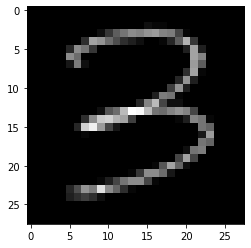

[[0.01952386 0.01905775 0.02617425 0.0226823  0.05820584 0.12911329
  0.54845643 0.00393836 0.17002633 0.00282151]]
예측숫자는 6 
----손글씨-----


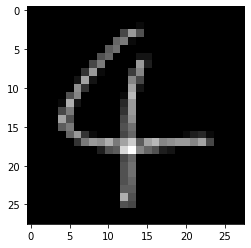

[[0.04146864 0.03105129 0.00961905 0.01073212 0.32891926 0.18693407
  0.08354063 0.01379315 0.2556419  0.03829989]]
예측숫자는 4 
----손글씨-----


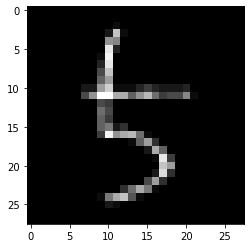

[[0.04517707 0.04080087 0.01282961 0.00479619 0.22096393 0.20556363
  0.15700038 0.01945853 0.2713123  0.0220976 ]]
예측숫자는 8 


In [ ]:
predict_img(img1)
predict_img(img2)
predict_img(img3)

## tmp를 사용하여 예측
- tmp를 사용하여 값이 0이면 0이고 그 외는 모두 1의 값으로 바꿔 흑백을 더 명확하게 표현한 뒤 예측 

In [ ]:
def predict_img2(imgSet):
    # [1] 사이즈 변경
    img_re = imgSet.resize((28,28)) # 가로(열, 폭, 너비) 이미지, 세로(행, 높이) 이미지

    # [2] 그레이스케일로 변경
    img_gr = img_re.convert('L') 

    # [3] 이미지 반전
    img_con = PIL.ImageOps.invert(img_gr)

    # [4] 0~1 사이값이다. (모델링 작업에서 한 스케일링과 똑같이 해야함.)
    img_sc = np.array(img_con)/255


    ####### 이 코드 이후가 predict_img와 다름 ############
    # [5] 28*28을 (1,784)로 변경
    tmp = img_sc.reshape(1,-1) # (1,784)와 동일
    for cnt in range(len(tmp[0])): # 0과 1로 원소값을 바꿈.
        if tmp[0][cnt] != 0.0:
            tmp[0][cnt] = 1.0

    result = load_model.predict(tmp)

    print('----손글씨-----')
    plt.imshow(tmp.reshape(28,28), cmap='gray')
    plt.show() 

    print(result)  
    print('예측숫자는 %d '%np.argmax(result))  

----손글씨-----


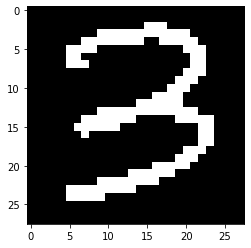

[[1.9689047e-18 9.5851231e-15 2.0307209e-05 9.9997735e-01 7.0220519e-29
  2.2521492e-06 8.7783704e-08 2.7314560e-20 1.1106762e-08 9.4687268e-21]]
예측숫자는 3 
----손글씨-----


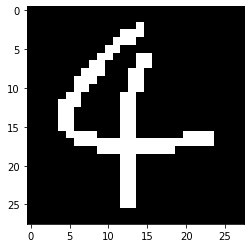

[[5.5139434e-01 2.2762363e-06 3.2722023e-06 9.8922862e-07 1.4805454e-06
  7.9164833e-02 3.5183188e-01 8.3287144e-10 1.7600819e-02 3.4375187e-08]]
예측숫자는 0 
----손글씨-----


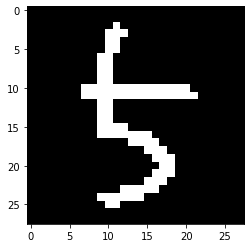

[[5.2209312e-09 5.2794632e-05 3.3501536e-08 4.6335618e-12 1.0871194e-15
  9.3333805e-01 6.2581025e-02 4.3652482e-09 4.0280689e-03 1.2234374e-16]]
예측숫자는 5 


In [ ]:
predict_img2(img1)
predict_img2(img2)
predict_img2(img3)

In [ ]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 앞에서 4가 잘 안나와서 모델이 어떤 4를 학습했는지 확인.
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
# npz는 npy라는 numpy형태의 자료를 압축한 자료(2개이상의 npy자료임), csv로 갖고다녀도 됨.

# x_train <- [0][0], y_train <- [0][1] / x_test <- [1][0], y_test <- [1][1]
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


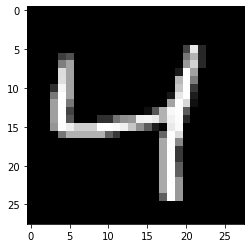

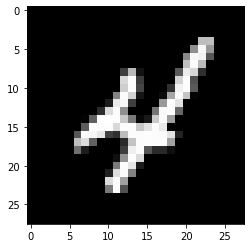

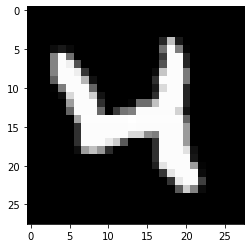

In [ ]:
list_ = []; cnt=0
for x in y_train:
    if x==4:
        list_.append(cnt)
    cnt += 1
num = list_[:3]

for y in num:
    plt.imshow(x_train[y], cmap = 'gray')
    plt.show()

- 이미지 파일이 .jpg일 경우 결과가 더 잘나올 수도 있음.